In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pysindy as ps 
from scipy.stats import norm
from utils.print_utils import print_model
from utils.model_utils import grind_hyper_search,threshold_remove
from utils.data_utils import load_data

In [29]:
data = load_data('../data/AAPL230721C00160000.csv')

data['Expiration Date'] = pd.to_datetime(data['Expiration Date'])
data['Date'] = pd.to_datetime(data['Date'])

data['tal'] = (data['Expiration Date'] - data['Date']).dt.days/365

In [42]:
u = data['Extrinsic Value'].values
x = data['Underlying Price'].values
t = data['tal'].values

C:\Users\Bruno Trotti\AppData\Local\Temp\ipykernel_12760\3759583077.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1)
C:\Users\Bruno Trotti\AppData\Local\Temp\ipykernel_12760\3759583077.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,3)
C:\Users\Bruno Trotti\AppData\Local\Temp\ipykernel_12760\3759583077.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,2)


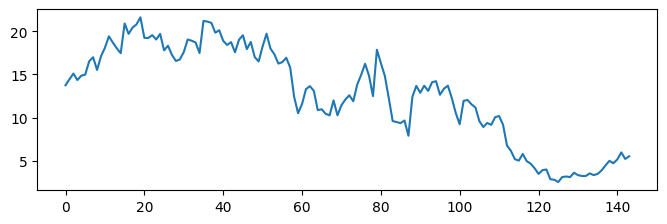

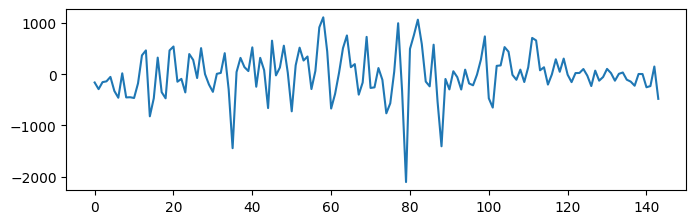

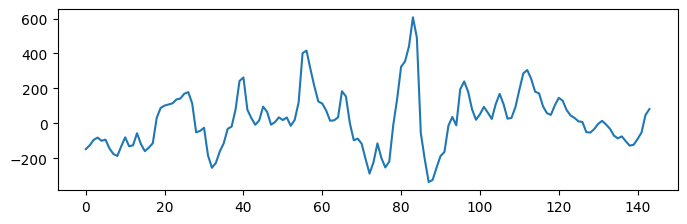

In [50]:
u_t = ps.SmoothedFiniteDifference()._differentiate(u,t = t)
u_t_ = ps.FiniteDifference(order = 4)._differentiate(u,t = t)

plt.figure(figsize=(8, 8))
plt.title('Option Price')
plt.subplot(3,1,1)
plt.plot(u)

plt.figure(figsize=(8, 8))
plt.title('Option time finite derivative ')
plt.subplot(3,1,3)
plt.plot(u_t_)

plt.figure(figsize=(8, 8))
plt.title('Option time smoothed derivative ')
plt.subplot(3,1,2)
plt.plot(u_t)
